In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
sales = pd.read_csv("SalesData.csv")

In [33]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [34]:
##sales1 = sales.groupby(['Region']).aggregate(...) or .agg(..)
sales1 = sales.groupby('Region')['Sales2015','Sales2016'].sum()

sales1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


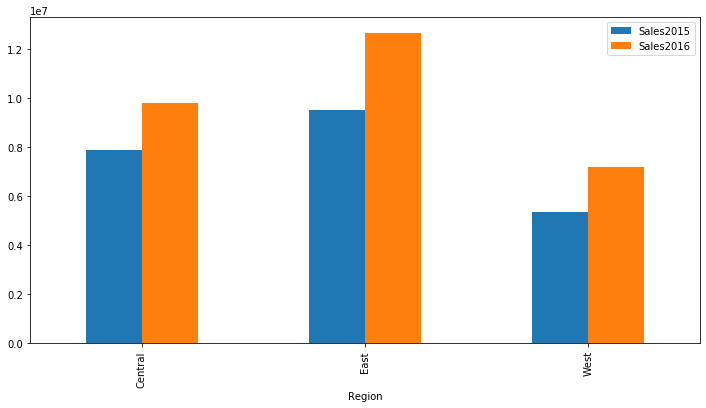

In [35]:
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C948BDE108>],
      dtype=object)

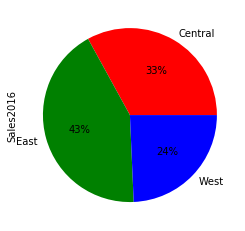

In [36]:
# sales2 = sales.groupby(['...']).aggregate({})
sales2 = sales.groupby('Region').Sales2016.sum()
sales2.plot(kind='pie', 
            ##labels=['sales2.Region'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [37]:
sales3 = sales.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum()
sales3

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

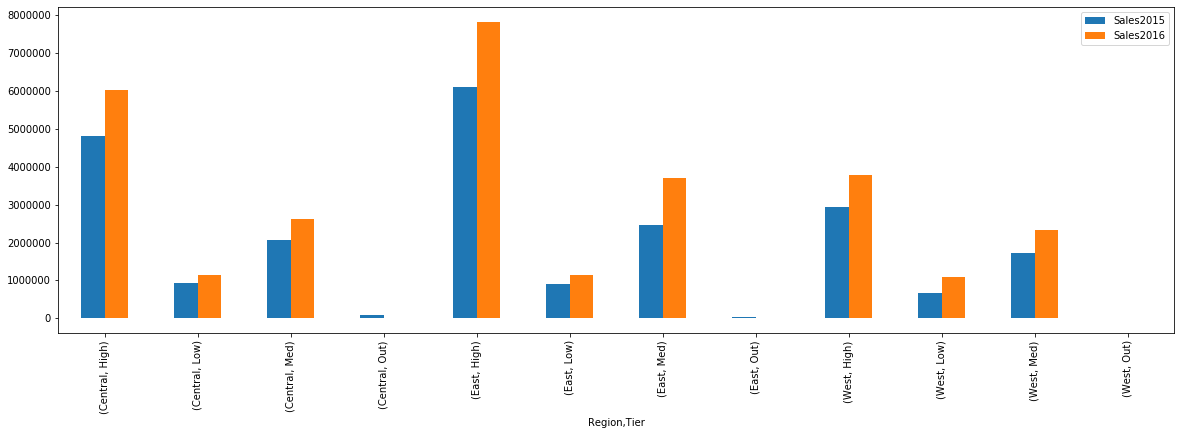

In [38]:
sales3graph=sales3.plot.bar(figsize=(20,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [39]:
sales4 = sales.iloc[np.where(sales.Region=='East')].groupby(['Region','State'])['Sales2015','Sales2016'].sum()

sales4

Sales2015   Sales2016
Region State                         
East   CT      197202.790   323502.31
       DC      216723.950   257421.69
       FL     1660162.000  2508232.28
       GA      681546.460   946919.77
       MA      419278.750   687096.45
       MD      527309.060   750008.79
       ME       77425.640   183673.05
       NC     1292801.640  1610521.00
       NH      136419.380   144717.51
       NJ      520419.290   782289.19
       NY     1725415.065  1703135.80
       PA      785092.755   894319.49
       RI      156311.800   162454.65
       SC      247811.780   463414.12
       TN       49677.000    70109.41
       VA      819319.130  1179414.94

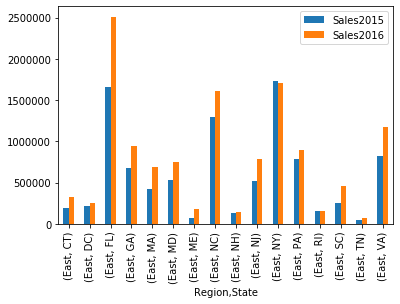

In [40]:
sales4.plot(kind='bar')

In [41]:
## In East Region, NY is the state which has shown decline

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [42]:
sales5 = sales.iloc[np.where(sales.Tier=='High')].groupby(['Tier','Division'])['Units2015','Units2016'].sum()

In [43]:
sales5

Units2015  Units2016
Tier Division                            
High BIG APPLE        180.8330   231.0000
     CHARGERS         123.6666   164.4999
     CONGRESSIONAL    164.5003   205.0000
     DIAMONDBACK      153.3334   176.6667
     EMPIRE           414.3332   449.3332
     GRIDIRON         213.6673   246.1675
     GULF STREAM      185.0000   301.0009
     HAILSTORM        187.8338   247.0003
     KINETIC          214.3334   244.5001
     MINUTEMEN        215.0000   267.5000
     MUDDY WATERS     150.6666   211.5004
     NORDIC           210.1675   225.8334
     NORTHWEST        135.5008   163.6669
     ORION            175.8334   276.0000
     RACEWAY          178.3338   297.0000
     REVOLUTION       205.8335   226.8334
     RIPTIDE          147.5002   183.8336
     SOUTHERN STAR    230.0000   274.1665
     STAMPEDE         192.4999   246.8333
     SYNERGY          322.6666   428.3334
     THE CAROLINAS    258.8335   345.0000
     TORNADO VALLEY   128.3331   181.0004
     VICTORY          174.5005   221.1669
     WAVE RIDER       173.4996   223.3332
     WOLVERINE        122.0002   143.0000
     WRANGLER         206.1666   259.6666

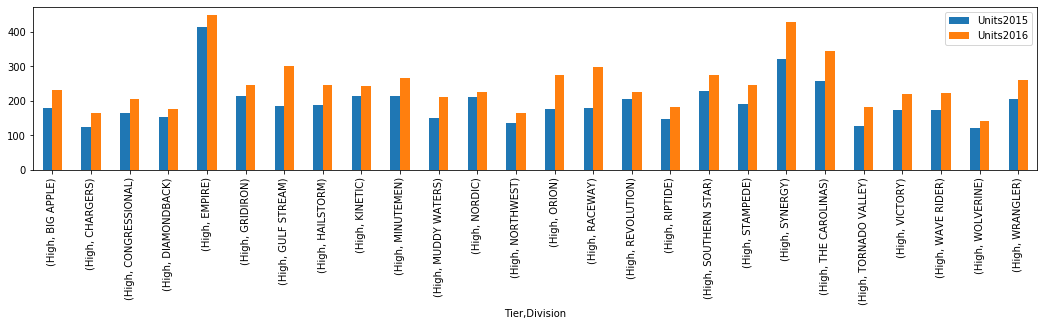

In [44]:
sales5.plot(kind='bar',figsize=(18,3))

In [45]:
## In all the High tier, NO Division saw a decline in number of units sold in 2016 compared to 2015.sales

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [46]:
df1=sales.iloc[np.where((sales.Month=='Jan')|(sales.Month=='Feb')|(sales.Month=='Mar'))]
df2=sales.iloc[np.where((sales.Month=='Apr')|(sales.Month=='May')|(sales.Month=='Jun'))]
df3=sales.iloc[np.where((sales.Month=='Jul')|(sales.Month=='Aug')|(sales.Month=='Sep'))]
df4=sales.iloc[np.where((sales.Month=='Oct')|(sales.Month=='Nov')|(sales.Month=='Dec'))]

In [47]:
df1['Qtr']='Q1'
df2['Qtr']='Q2'
df3['Qtr']='Q3'
df4['Qtr']='Q4'

C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\goura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [48]:
df4

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0000,7.0,0.84,1.31,Q4
15,2418,Account11,East,BIG APPLE,JERSEY CITY,NJ,Med,Oct,0.00,24570.26,0.0000,8.0,1.15,1.54,Q4
17,2426,Account13,East,BIG APPLE,PATERSON,NJ,High,Oct,0.00,3128.34,0.0000,1.0,1.42,1.23,Q4
20,2428,Account14,East,BIG APPLE,PATERSON,NJ,High,Nov,17152.26,20375.17,6.0000,7.0,1.04,1.09,Q4
24,2435,Account17,East,BIG APPLE,PATERSON,NJ,High,Nov,6256.68,0.00,2.0000,0.0,0.97,1.18,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,26495,Account2722,Central,RACEWAY,LOUISVILLE E,KY,High,Nov,17589.93,27480.84,7.0000,11.0,1.07,0.98,Q4
3695,7920,Account2725,East,ORION,SAINT PETERSBURG,FL,Med,Nov,0.00,16163.05,0.0000,5.0,0.77,1.18,Q4
3701,7076,Account2735,Central,WRANGLER,HOUSTON S,TX,High,Nov,-11053.44,0.00,-3.0000,0.0,0.92,1.26,Q4
3703,7076,Account2735,Central,WRANGLER,HOUSTON S,TX,High,Oct,22575.87,0.00,5.9999,0.0,1.03,1.13,Q4


In [49]:
final_df=df1.append(df2.append(df3.append(df4)))

In [50]:
final_df[['Month','Qtr']]

,Month,Qtr
3,Mar,Q1
6,Feb,Q1
7,Mar,Q1
8,Mar,Q1
10,Feb,Q1
...,...,...
3693,Nov,Q4
3695,Nov,Q4
3701,Nov,Q4
3703,Oct,Q4


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [51]:
sales7=final_df.groupby('Qtr')['Sales2015','Sales2016'].sum()

In [52]:
sales7

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


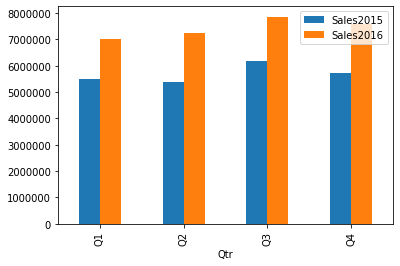

In [53]:
sales7.plot(kind="bar")

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [54]:
final_df.Tier.unique()

array(['Med', 'High', 'Low', 'Out'], dtype=object)

In [56]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = final_df[final_df['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier']).Sales2016.sum()                                     ##aggregate({...})
sales8 = sales8.round(decimals=0).reset_index()
sales8 = sales8.pivot(index='Tier',columns='Qtr',values='Sales2016')##stack() # long to wide data
##sales8 = sales8.unstack(level=0)
sales8

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3867719.0,4130953.0,4872559.0,4740002.0
Low,948833.0,890595.0,795178.0,742659.0
Med,2181402.0,2215814.0,2197058.0,2085207.0


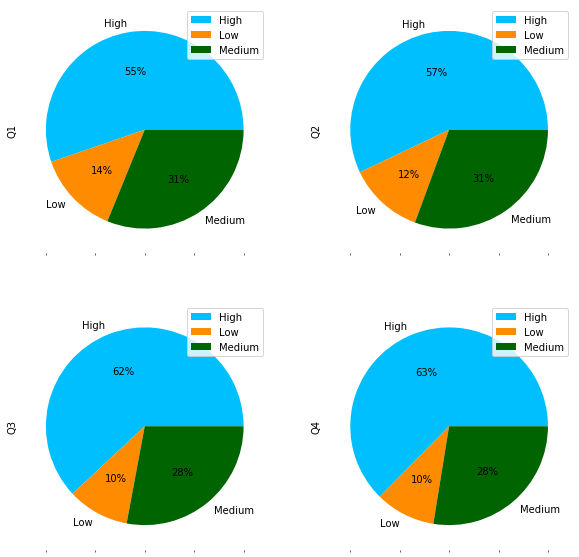

In [57]:
sales8.plot(kind='pie', 
            labels=['High','Low','Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C947094D88>,
      dtype=object)

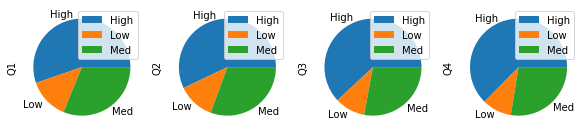

In [58]:
sales8.plot(kind='pie',subplots=True,figsize=(10,10),layout=(1,4))